In [10]:
# import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
sns.set_palette("pastel")

In [11]:
# create dummy dataset
data = pd.DataFrame([[0.6, 0.6, 1],
                     [1, 0.6, 0.4]],
                     columns = ['GCT', 'Bridging', 'Local'],
                     index = ['Predictable', 'Unpredictable'])

data.head()

,GCT,Bridging,Local
Predictable,0.6,0.6,1.0
Unpredictable,1.0,0.6,0.4


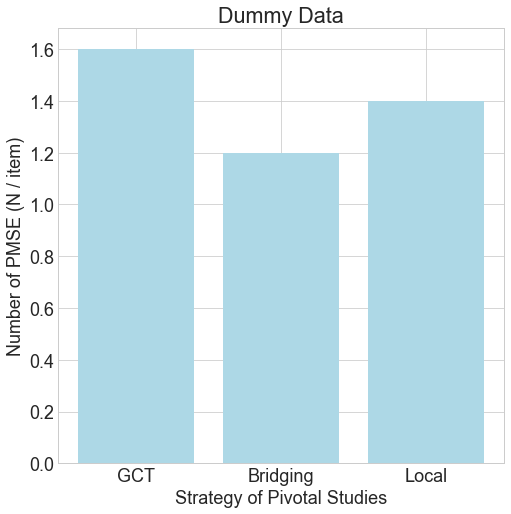

In [12]:
# images of analysis
plt.figure(figsize = (8, 8))
plt.rcParams["font.size"] = 18

_ = plt.bar(data.columns,
            data.sum(),
            color = 'lightblue')
_ = plt.xlabel('Strategy of Pivotal Studies')
_ = plt.ylabel('Number of PMSE (N / item)')
_ = plt.title('Dummy Data')


plt.show();

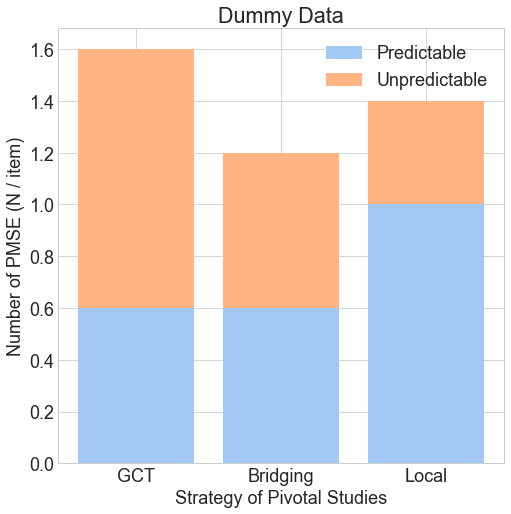

In [13]:
# images of analysis
plt.figure(figsize = (8, 8))
plt.rcParams["font.size"] = 18

for i in range(len(data)) :
    _ = plt.bar(data.columns,
                data.iloc[i],
                bottom = data.iloc[:i].sum())

_ = plt.xlabel('Strategy of Pivotal Studies')
_ = plt.ylabel('Number of PMSE (N / item)')
_ = plt.title('Dummy Data')
plt.legend(data.index)

plt.show();

In [14]:
# normalize the dataset
norm_data = pd.DataFrame(index = data.index)
for col in data.columns:
    norm_data[col] = round(100 * data[col] / data[col].sum(), 1)

norm_data.head()

,GCT,Bridging,Local
Predictable,37.5,50.0,71.4
Unpredictable,62.5,50.0,28.6


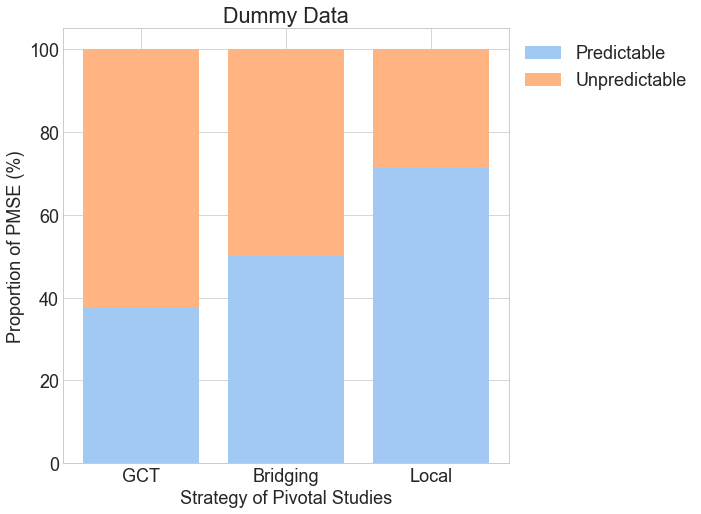

In [15]:
# images of analysis
plt.figure(figsize = (8, 8))
plt.rcParams["font.size"] = 18

for i in range(len(norm_data)) :
    _ = plt.bar(norm_data.columns,
                norm_data.iloc[i],
                bottom = norm_data.iloc[:i].sum())

_ = plt.xlabel('Strategy of Pivotal Studies')
_ = plt.ylabel('Proportion of PMSE (%)')
_ = plt.title('Dummy Data')
plt.legend(norm_data.index,
           loc = 'upper left',
           bbox_to_anchor = (1, 1))

plt.show();